# **Feature Scaling & Normalization with Heart Disease**

## **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

## **Loading The Dataset**

In [3]:
disease = pd.read_csv(r"C:\Users\bbuser\Desktop\NumPy\DataScience-Brain-Bytes\DataScience-Brain-Bytes\Team_members\from_deena\data\heart.csv")
disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


## **Dataset Eploration**

In [4]:
disease.shape

(1025, 14)

In [7]:
disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## **Target variable**

In [10]:
X = disease.drop("target", axis=1)
y = disease["target"]

## **Train & Test**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## **Feature preprocessing**

In [12]:
categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
numerical_features = [col for col in X.columns if col not in categorical_features]

def build_preprocessor(scaler=None):
    transformers = []
    # Categorical one-hot encoding
    transformers.append(("cat", OneHotEncoder(drop="first"), categorical_features))
    # Numerical scaling (optional)
    if scaler is not None:
        transformers.append(("num", scaler, numerical_features))
    else:
        transformers.append(("num", "passthrough", numerical_features))
    return ColumnTransformer(transformers)

## **Neural network model builder**

In [13]:
def build_model(input_dim, lr=0.01):
    model = Sequential([
        Dense(32, activation="relu", input_shape=(input_dim,)),
        Dense(16, activation="relu"),
        Dense(1, activation="sigmoid")
    ])
    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

## **Experiment runner**

In [15]:
def run_experiment(name, preprocessor, X_train, X_test, y_train, y_test, lr=0.01):
    print(f"\n=== Running {name} ===")
    
    # Transform data
    X_train_proc = preprocessor.fit_transform(X_train)
    X_test_proc = preprocessor.transform(X_test)
    
    # Build model
    model = build_model(input_dim=X_train_proc.shape[1], lr=lr)
    
    # Early stopping
    es = EarlyStopping(patience=10, restore_best_weights=True, monitor="val_loss")
    
    # Train
    history = model.fit(
        X_train_proc, y_train,
        validation_split=0.2,
        epochs=100,
        batch_size=32,
        callbacks=[es],
        verbose=0
    )
    
    # Evaluate
    loss, acc = model.evaluate(X_test_proc, y_test, verbose=0)
    print(f"Test Accuracy: {acc:.4f}")
    
    # Plot loss curve
    plt.plot(history.history["loss"], label="train")
    plt.plot(history.history["val_loss"], label="val")
    plt.title(f"Loss Curve - {name}")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    
    return acc

## **Run experiments**


=== Running Raw Data ===


C:\Users\bbuser\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.8585


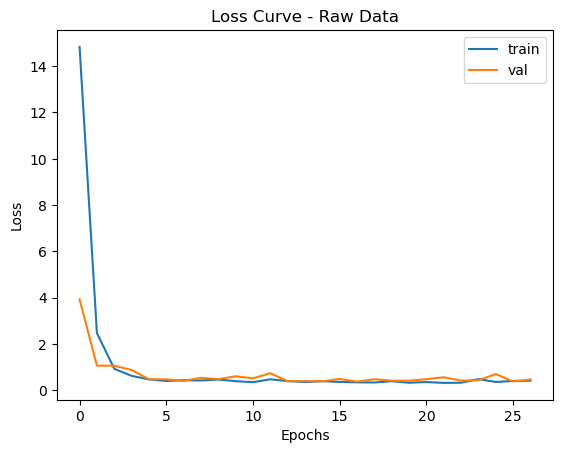


=== Running MinMaxScaler ===


C:\Users\bbuser\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.9756


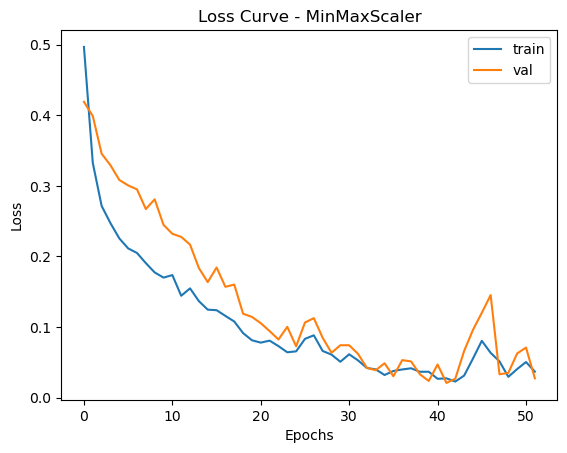


=== Running StandardScaler ===


C:\Users\bbuser\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 1.0000


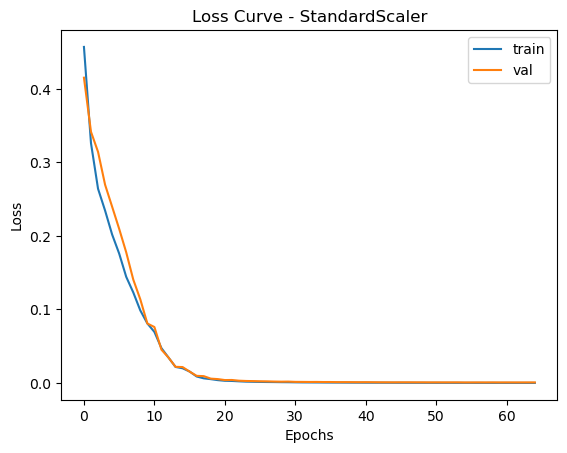

In [16]:
results = {}

# Raw (no scaling)
raw_preprocessor = build_preprocessor(scaler=None)
results["Raw"] = run_experiment("Raw Data", raw_preprocessor, X_train, X_test, y_train, y_test)

# MinMaxScaler
minmax_preprocessor = build_preprocessor(scaler=MinMaxScaler())
results["MinMaxScaler"] = run_experiment("MinMaxScaler", minmax_preprocessor, X_train, X_test, y_train, y_test)

# StandardScaler
std_preprocessor = build_preprocessor(scaler=StandardScaler())
results["StandardScaler"] = run_experiment("StandardScaler", std_preprocessor, X_train, X_test, y_train, y_test)

## **Compare Results**

In [22]:
print("\nFinal Comparison")
for k, v in results.items():
    print(f"{k}:\n Accuracy = {v:.4f}")


Final Comparison
Raw:
 Accuracy = 0.8585
MinMaxScaler:
 Accuracy = 0.9756
StandardScaler:
 Accuracy = 1.0000


## **Observations**

* NNs usually train poorly on raw features (slower convergence, unstable loss).
* Standardization often works better than normalization for NNs.
* One-hot encoding improves handling of categorical vars.
* Scaled features reduce sensitivity to LR.